In [1]:
import cv2
from plantcv import plantcv as pcv

In [2]:
class options:
    def __init__(self):
        self.image = "./DroneImages/3_OT7100_3_AUSTRIAN FIELD PEAS_2_Bio Mass 1 picture_1_2023-06-06-09-43-01.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "Output/"
        self.outdir = "."

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

In [5]:
plantcv-train.py naive_bayes_multiclass --file OatPeaPixels.txt --outfile naive_bayes_pdfs.txt --plots

SyntaxError: invalid syntax (547561213.py, line 1)

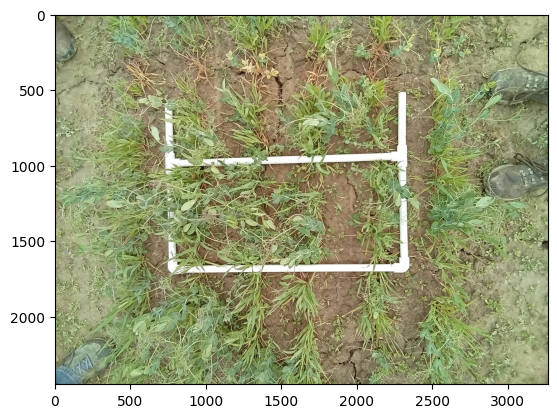

In [3]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
img, path, filename = pcv.readimage(filename=args.image)